In [1]:
# Load in Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
#Bring in your dataset
df = pd.read_csv('insurance.csv')

#convert the data into dummy variables
df1= pd.get_dummies(df,drop_first=True)

In [3]:
#Look at the original data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Look at the converted data
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [5]:
#create a regression model
model = LinearRegression()

In [6]:
#create X and Y variables
X = df1.drop('charges', axis=1)
y = df1['charges']

In [7]:
X_train, X_test, y_train,y_test = train_test_split(X,y)

In [8]:
# fit the model to Learn on the training data
model.fit(X_train,y_train)

LinearRegression()

In [9]:
# Let's see what the coefficients are and their influence on charges
pd.DataFrame(zip(X.columns,model.coef_),columns=['Features','Influence/Coefficients']).\
    sort_values(by='Influence/Coefficients', ascending=False)

,Features,Influence/Coefficients
4,smoker_yes,23304.256215
2,children,410.664781
1,bmi,326.780709
0,age,254.243224
3,sex_male,-334.119504
5,region_northwest,-586.062324
6,region_southeast,-786.127023
7,region_southwest,-909.041518


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


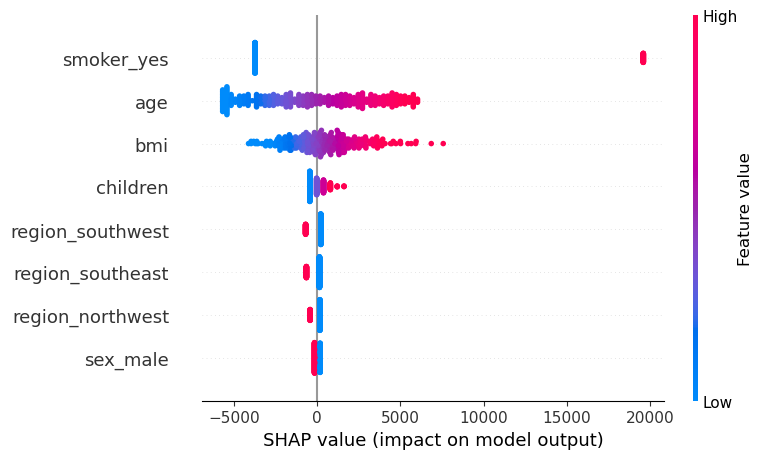

In [10]:
# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

In [11]:
# initialize a new model
model2 = XGBRegressor()
model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
# Let's see what the coefficients are and their influence on charges
pd.DataFrame(zip(X.columns , model2.feature_importances_) , columns=['Features' , 'Influence/Coefficients']).\
    sort_values( by = 'Influence/Coefficients', ascending = False)

,Features,Influence/Coefficients
4,smoker_yes,0.932552
1,bmi,0.020607
0,age,0.016768
5,region_northwest,0.010860
2,children,0.006935
6,region_southeast,0.004309
3,sex_male,0.004174
7,region_southwest,0.003795


In [13]:
# Lets create some predictions
y_pred = model.predict(X_test)

In [14]:
# what is are average error
round(np.sqrt(mean_squared_error(y_test , y_pred)), 1)

6305.9